<a href="https://colab.research.google.com/github/Aischy/MPA-MLF/blob/main/Ex_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # MPA-MLF, Lab 7 - Convolutional Neural Network

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [49]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

###################################
# Write your own code here #
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.metrics import confusion_matrix
import seaborn as sns


###################################

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### 1.2 Dataset examination

Using the following code, display random images,

In [4]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

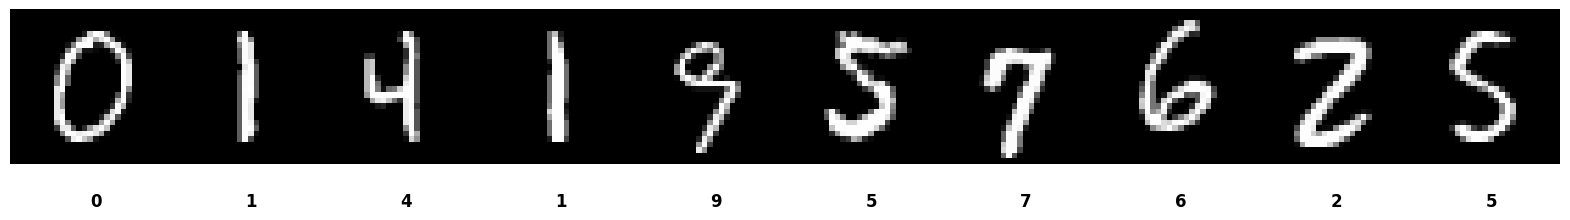

In [5]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset? **Images of handwritten digits**

- How many data samples do we have in train and test datasets? **60.000 images for training and 10.000 for testing**
- How many colour channels does the input variable have? **one color channel, representing grayscale values. Each pixel is typically represented by a single intensity value ranging from 0 (black) to 255 (white).**
- What is the size of the input images? **28x28 pixels**
- What is the necessary preprocessing of the input data X?
**In the case of a convolutional neural network (CNN), the input images may need to be reshaped to have a shape of (28, 28, 1) to represent the height, width, and number of color channels.**
- How many classes do we have in target variable? **10 classes in the target variable, corresponding to the digits 0 through 9.**
- What is the necessary preprocessing of target variable y? **The necessary preprocessing of the target variable y typically involves one-hot encoding, where each class label is represented as a binary vector with a 1 at the index corresponding to the class and 0s elsewhere. This is necessary for training a multi-class classification model.**

In [6]:
# Labels representing the dataset
labels = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}

# Check the shape of image dataset
X_train.shape

(60000, 28, 28)

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [7]:
#

X_train_scaled = X_train.astype(np.float32) / 255.0
y_train_encoded = to_categorical(y_train, num_classes=10)

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [57]:
#

model = Sequential([

    # CNN : Convolution and MaxPooling layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Dropout(0.2),

    # Dense layers
    Flatten(),
    Dense(10, activation='softmax')

])



#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 64)         

In [59]:
#

loss = 'categorical_crossentropy'
metrics = ['accuracy']
learning_rate = 0.001
optimizer = Adam(learning_rate = 0.0001)


model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [60]:
epochs = 150
batch_size = 512
validation_split = 0.2

history = model.fit(X_train_scaled, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split = validation_split)

Epoch 1/150
94/94 [==============================] - 3s 18ms/step - loss: 2.1137 - accuracy: 0.4105 - val_loss: 1.7820 - val_accuracy: 0.7586
Epoch 2/150
94/94 [==============================] - 1s 13ms/step - loss: 1.2743 - accuracy: 0.7178 - val_loss: 0.7851 - val_accuracy: 0.8274
Epoch 3/150
94/94 [==============================] - 1s 12ms/step - loss: 0.6948 - accuracy: 0.8045 - val_loss: 0.4845 - val_accuracy: 0.8790
Epoch 4/150
94/94 [==============================] - 1s 12ms/step - loss: 0.5185 - accuracy: 0.8483 - val_loss: 0.3747 - val_accuracy: 0.9018
Epoch 5/150
94/94 [==============================] - 1s 13ms/step - loss: 0.4307 - accuracy: 0.8711 - val_loss: 0.3158 - val_accuracy: 0.9141
Epoch 6/150
94/94 [==============================] - 1s 12ms/step - loss: 0.3740 - accuracy: 0.8874 - val_loss: 0.2747 - val_accuracy: 0.9239
Epoch 7/150
94/94 [==============================] - 1s 12ms/step - loss: 0.3291 - accuracy: 0.9006 - val_loss: 0.2445 - val_accuracy: 0.9334
Epoch 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

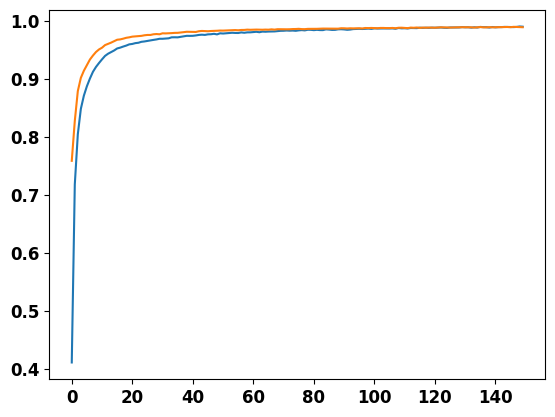

In [61]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

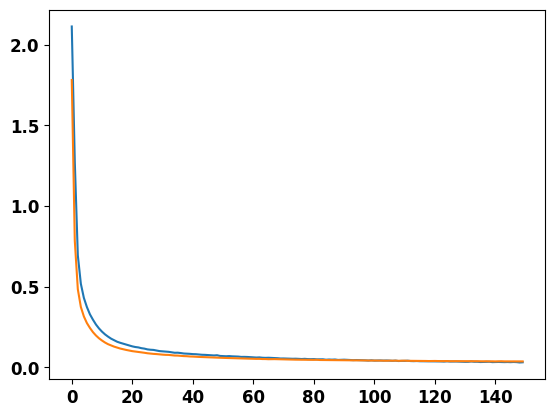

In [62]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

In [65]:
X_test_scaled = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

score = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.030351391062140465
Test accuracy: 99.04000163078308 %


313/313 [==============================] - 1s 2ms/step


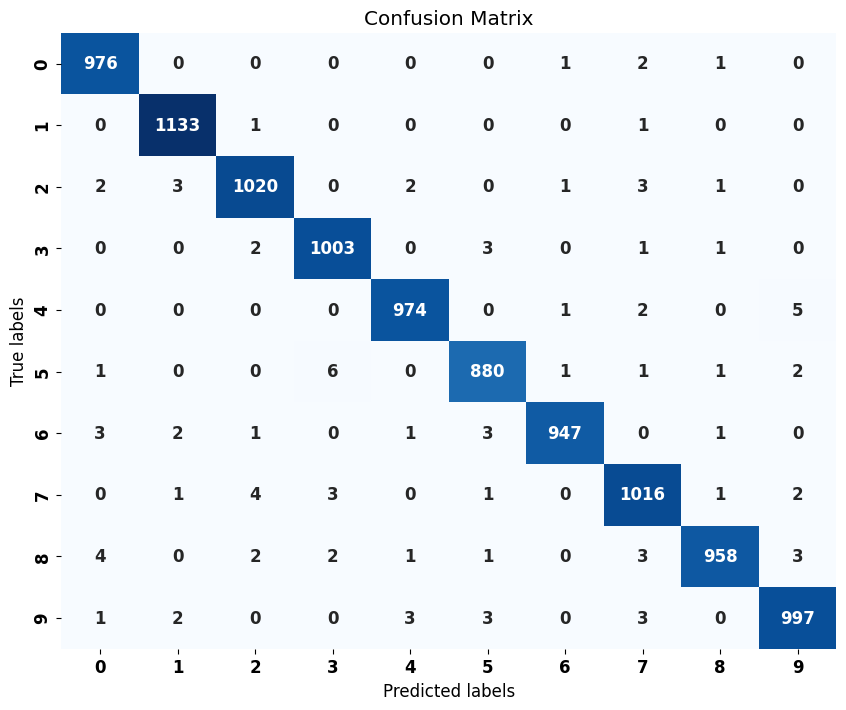

In [64]:
#

# Calcul of the confusion matrix
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

Using the code I'd used for lab 06 (I'd already introduced the CNN), I achieved 97% success.
By varying the parameters slightly, I managed to achieve an accuracy of 99,04%.   